In [4]:
#Import libraries for visualization and data analysis

import sys 
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan
from numpy import isnan

In [5]:
# Import data modeling library - methods - machine learning

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
# Function to fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]


In [13]:
# load all data
data = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

# Replace the missing values with nan
data.replace('?', nan, inplace=True)

# convert datatype of all variables to float
data = data.astype('float32')

## finding all columns that have missing values:
droping_list_all=[]
for j in range(0,7):
    if not data.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
droping_list_all


[0, 1, 2, 3, 4, 5, 6]

In [14]:
#Counting the missing values
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('missing values: ', count, count*100/2075259,'%')

missing values:  25979 1.2518437457686005 %


In [15]:
# fill missing values using the pre-defined function 
fill_missing(data.values)

# adding a new column for remainder of sub metering
values = data.values
data['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

# save updated dataset
data.to_csv('household_power_consumption.csv')

In [16]:
data.shape

(2075259, 8)

In [11]:
data.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0,43.099998


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
Global_active_power      float32
Global_reactive_power    float32
Voltage                  float32
Global_intensity         float32
Sub_metering_1           float32
Sub_metering_2           float32
Sub_metering_3           float32
sub_metering_4           float32
dtypes: float32(8)
memory usage: 79.2 MB


In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,2075259.000,2075259.000,2075259.000,2075259.000,2075259.000,2075259.000,2075259.000,2075259.000
mean,1.090,0.124,243.432,4.620,1.118,1.291,6.449,9.299
std,1.054,0.113,4.148,4.430,6.093,5.734,8.457,9.558
min,0.076,0.000,223.200,0.200,0.000,0.000,0.000,-2.400
25%,0.308,0.048,238.990,1.400,0.000,0.000,0.000,3.800
50%,0.602,0.100,241.000,2.600,0.000,0.000,1.000,5.500
75%,1.526,0.194,242.870,6.400,0.000,1.000,17.000,10.367
max,11.122,1.390,254.150,48.400,88.000,80.000,31.000,124.833


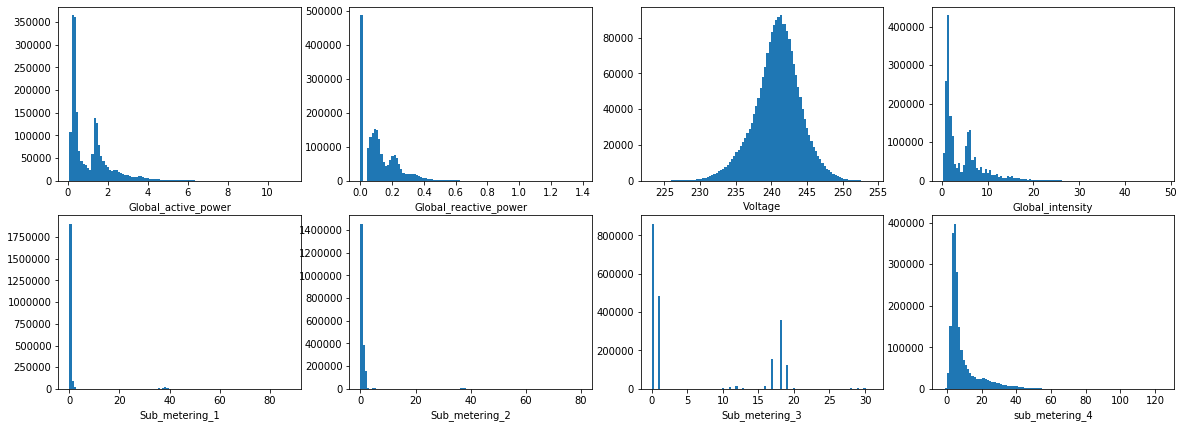

In [14]:
#Visualization:
#Check the distributions of variables:
# histogram plot for each variable
plt.figure(figsize=(20, 30))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 4, i+1)
    name = data.columns[i]
    data[name].hist(bins=100)
    plt.xlabel(name)
    plt.grid(False)
plt.show();

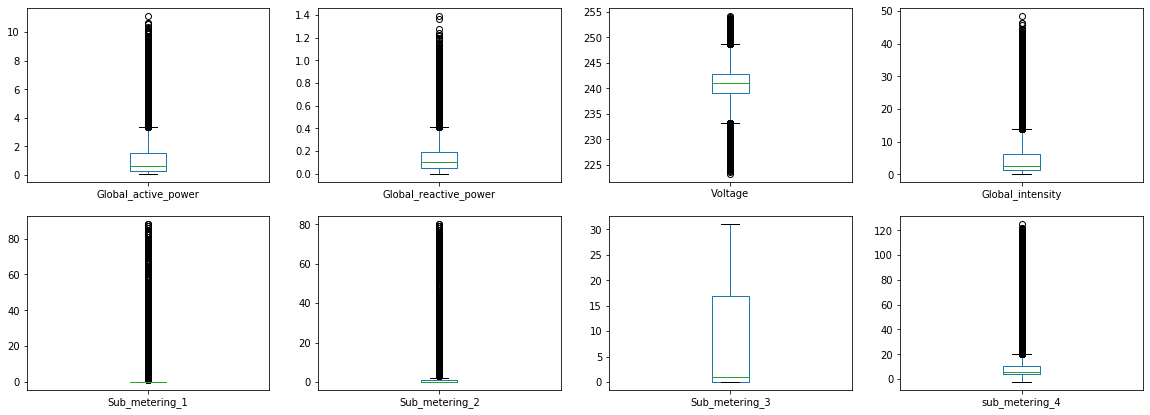

In [15]:
#Check for the outliers , mean and median comparison
plt.figure(figsize=(20, 30))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 4, i+1)
    name = data.columns[i]
    data.boxplot([name])
    plt.grid(False)
plt.show()

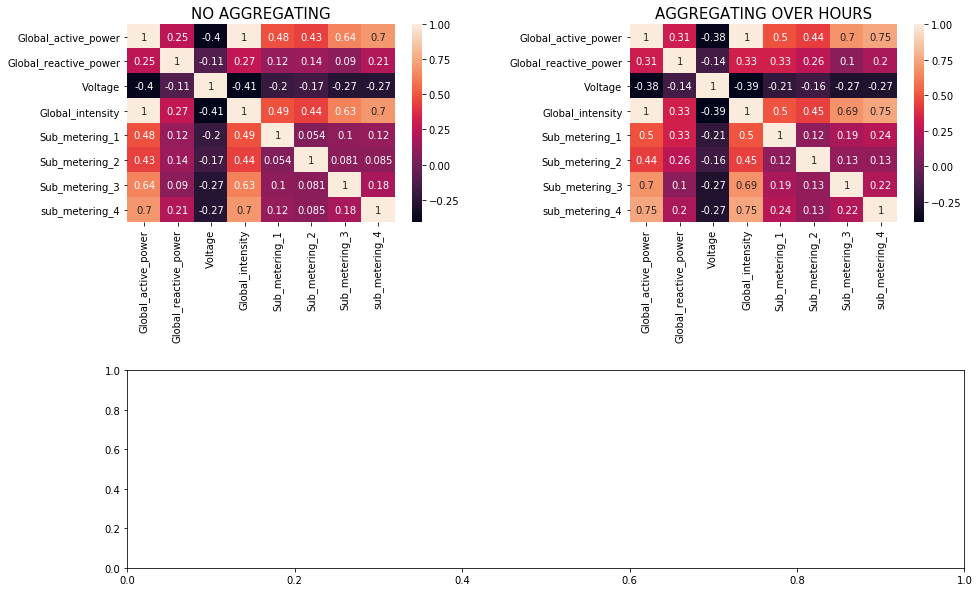

In [18]:
#Correlations
# calculate the correlation matrices
corr = data.corr()
corr_H = data.resample('H').mean().corr()

# plot the heatmaps
fig,ax = plt.subplots(2,1, figsize=(15, 10))
plt.subplot(221)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)
plt.title('NO AGGREGATING', size=15)
plt.subplot(222)
sns.heatmap(corr_H, 
        xticklabels=corr_H.columns,
        yticklabels=corr_H.columns,annot=True)
plt.title('AGGREGATING OVER HOURS',size=15)

plt.subplots_adjust(hspace=0.75,
                    wspace=0.5);


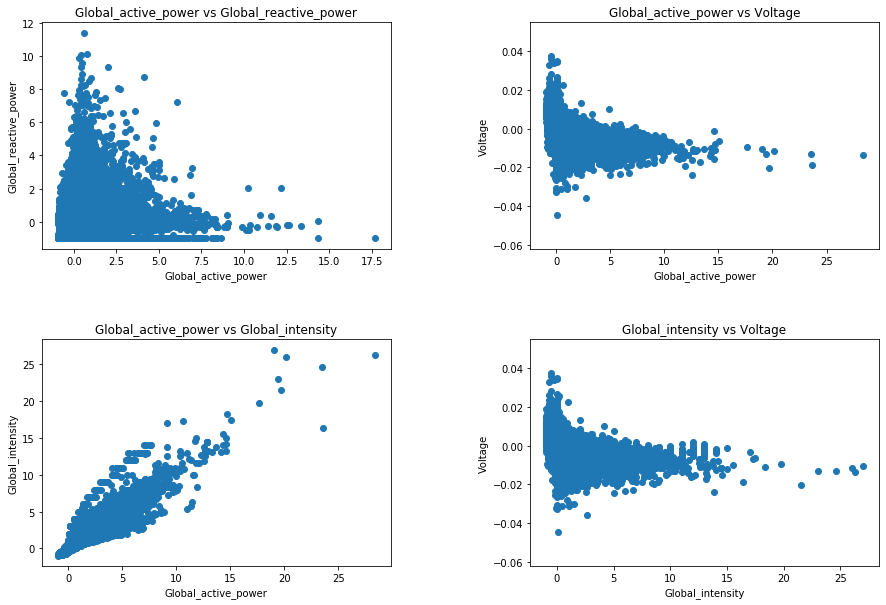

In [21]:
#Plot the correlation between some variables
fig,ax = plt.subplots(2,2, figsize=(15, 10))
data_updated=data.pct_change()
ax[0,0].scatter('Global_active_power','Global_reactive_power', data=data_updated)
ax[0,0].set_title('Global_active_power vs Global_reactive_power')
ax[0,0].set_xlabel('Global_active_power')
ax[0,0].set_ylabel('Global_reactive_power')
ax[0,1].scatter('Global_active_power','Voltage', data=data_updated)
ax[0,1].set_title('Global_active_power vs Voltage')
ax[0,1].set_xlabel('Global_active_power')
ax[0,1].set_ylabel('Voltage')
ax[1,0].scatter('Global_active_power','Global_intensity', data=data_updated)
ax[1,0].set_title('Global_active_power vs Global_intensity')
ax[1,0].set_xlabel('Global_active_power')
ax[1,0].set_ylabel('Global_intensity')
ax[1,1].scatter('Global_intensity','Voltage', data=data_updated)
ax[1,1].set_title('Global_intensity vs Voltage')
ax[1,1].set_xlabel('Global_intensity')
ax[1,1].set_ylabel('Voltage')
plt.subplots_adjust(hspace=0.4,
                    wspace=0.4);

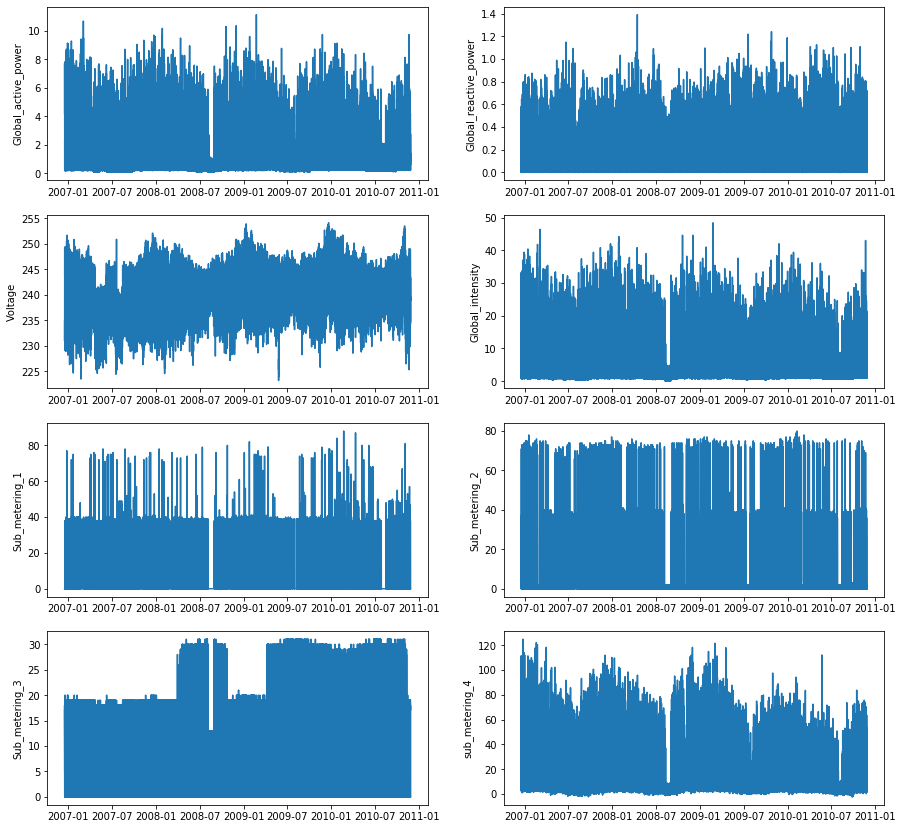

In [18]:
#Plot the variables across datetime
plt.figure(figsize=(15, 30))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 2, i+1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.ylabel(name)
    plt.grid(False)
plt.show();

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


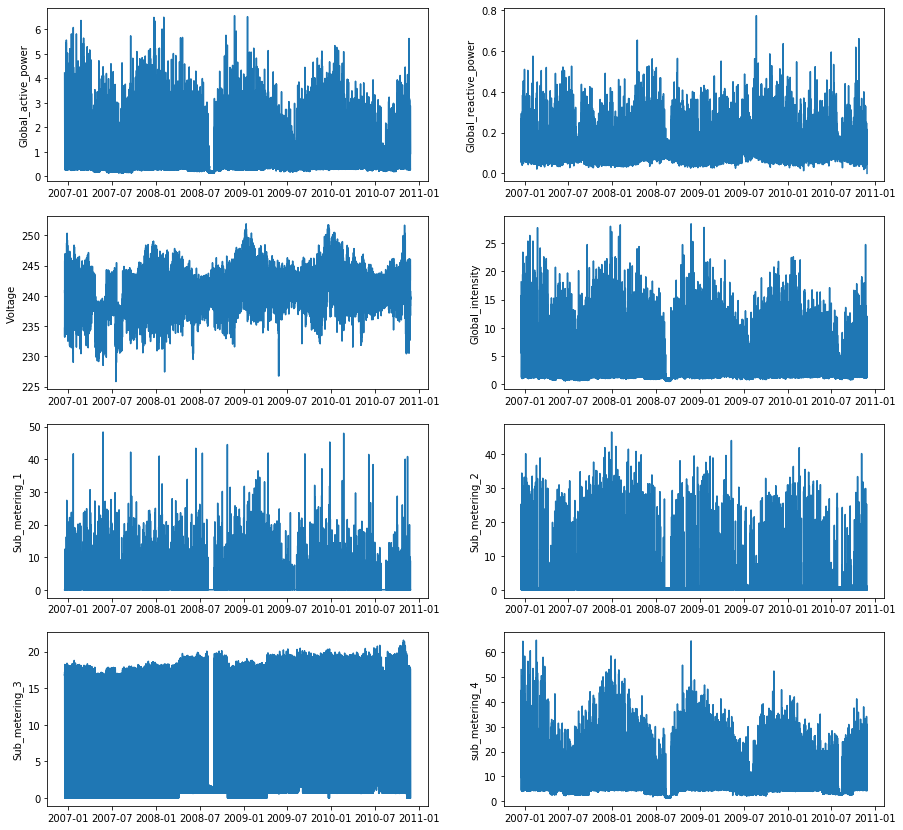

In [22]:
#Plot the variables across datetime - resampled over hour
data1=data.resample('H').mean()
plt.figure(figsize=(15, 30))
for i in range(len(data1.columns)):
    plt.subplot(len(data1.columns), 2, i+1)
    name = data1.columns[i]
    plt.plot(data1[name])
    plt.ylabel(name)
    plt.grid(False)
plt.show();

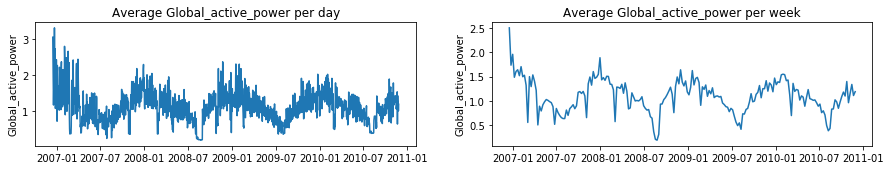

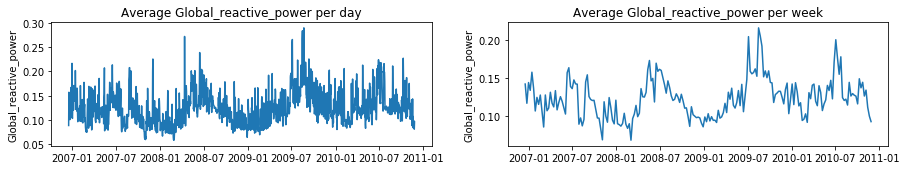

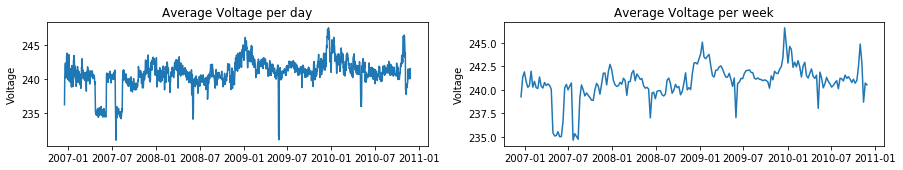

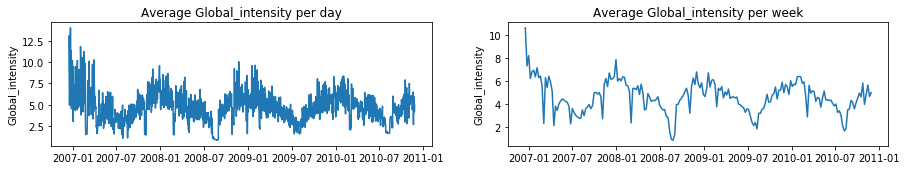

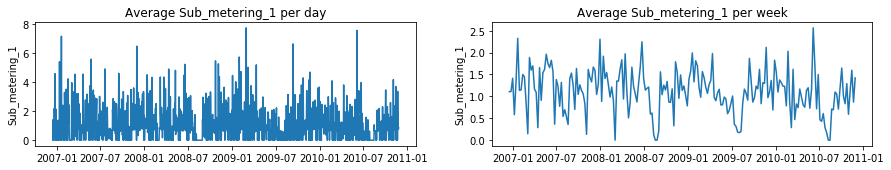

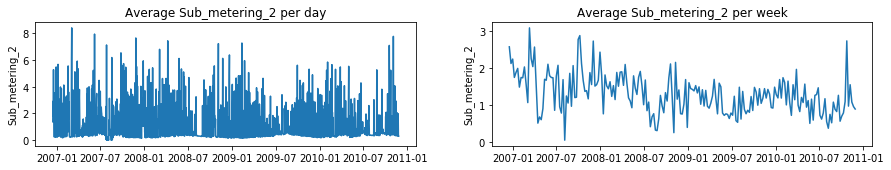

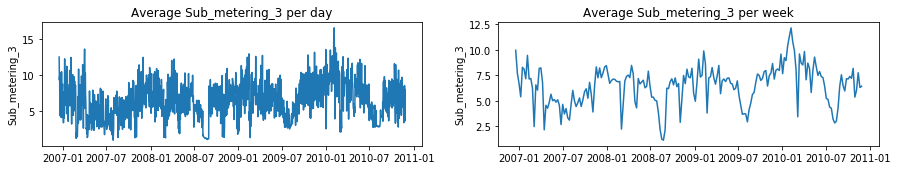

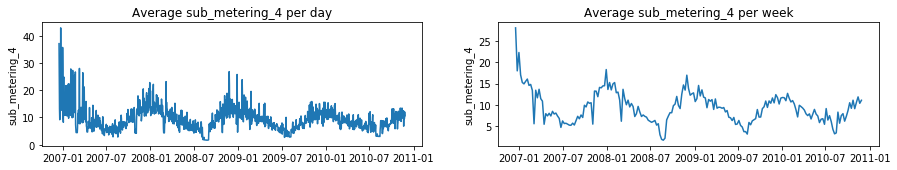

In [19]:
#Plot average values of all variables resampled over day and week
for i in range(len(data.columns)):
    plt.figure(figsize=(15, 5))
    j=0
    plt.subplot(2, 2, j+1)
    name = data.columns[i]
    plt.plot(data[name].resample('D').mean())
    title='Average '+ name + ' per day'
    plt.title(title)
    plt.ylabel(name)
    plt.grid(False)
    j=j+1
    plt.subplot(2, 2, j+1)
    plt.plot(data[name].resample('W').mean())
    title='Average '+ name + ' per week'
    plt.title(title)
    plt.ylabel(name)
    plt.grid(False)    
plt.show()

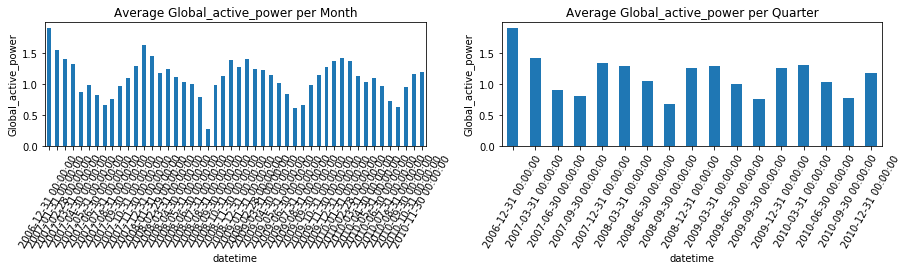

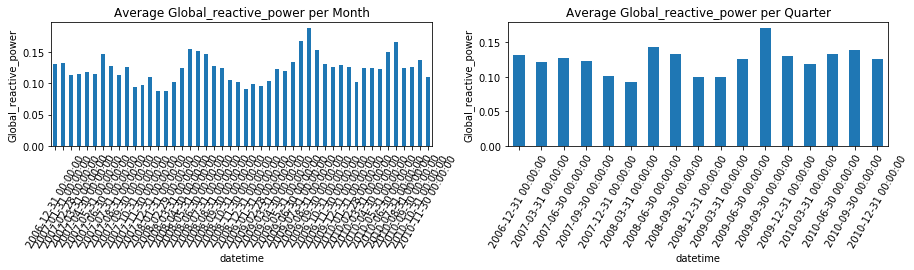

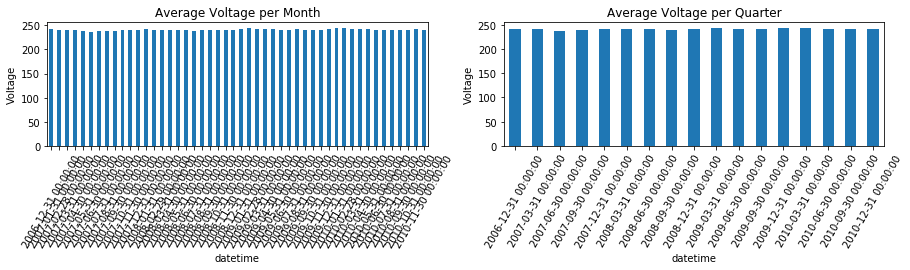

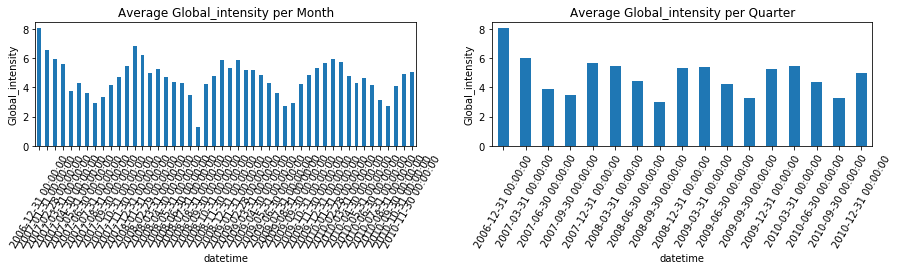

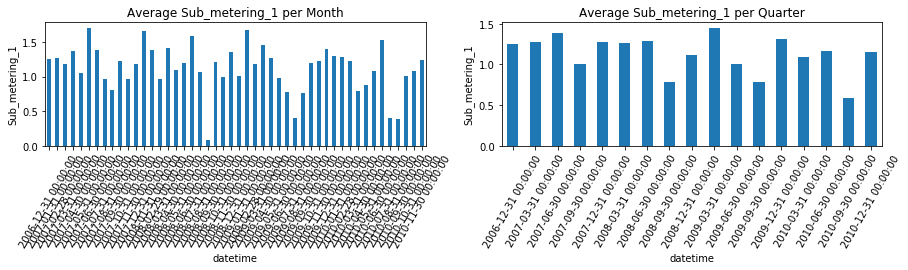

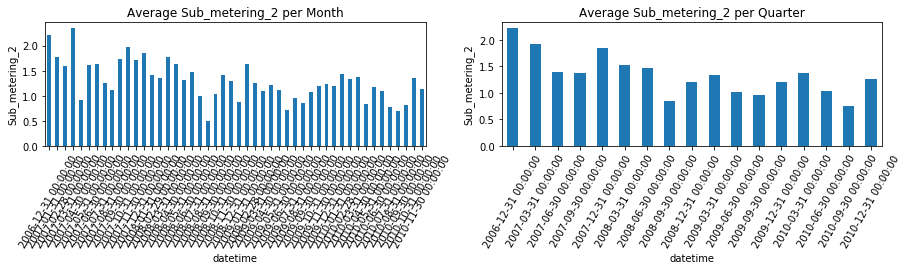

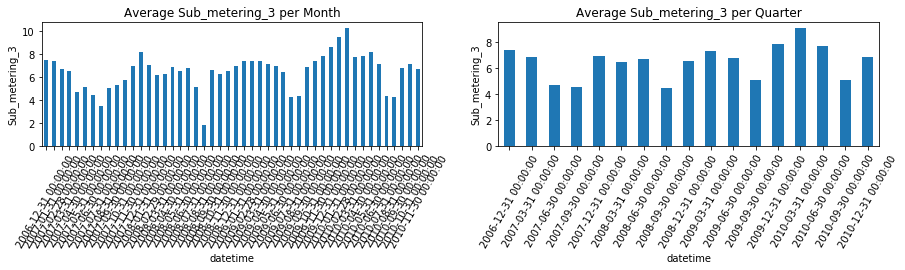

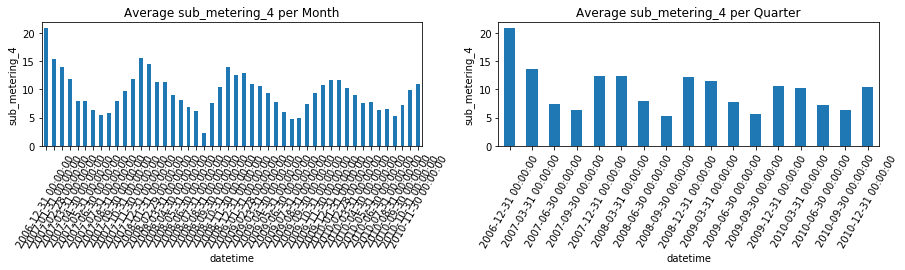

In [20]:
#Plot average values of all variables resampled over month and quarter
x=['M','Q']
y=['Month','Quarter']

for i in range(len(data.columns)):
    plt.figure(figsize=(15, 5))
    k=0
    for j in range(len(x)):
        plt.subplot(2, 2, k+1)
        name = data.columns[i]
        resample=x[j]
        data[name].resample(resample).mean().plot(kind='bar')
        title='Average '+ name+ ' per '+y[j]
        plt.title(title)
        plt.grid(False)
        plt.xticks(rotation=60)
        plt.ylabel(name)
        k=k+1
        
plt.show();

In [21]:
from statsmodels.tsa.stattools import adfuller
#Function for stationarity check 
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    #print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
        return True
    else:
        print(f" Series is Non-Stationary")
        return False

In [22]:
#Function to make stationary
def difference(dataset, interval=1):
    diff = list()
    diff.append(0)
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

In [23]:
data_resampled=data.resample('M').mean()

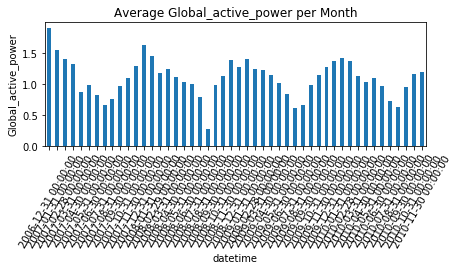

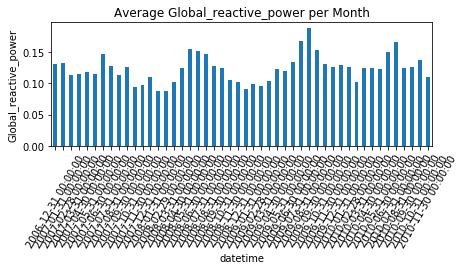

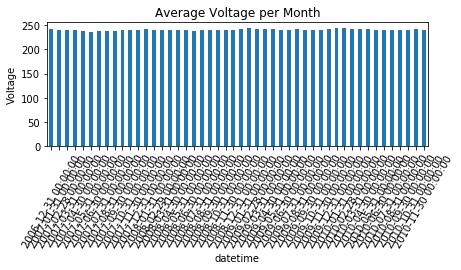

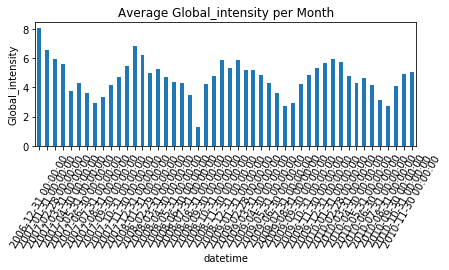

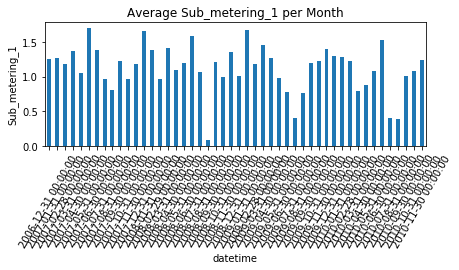

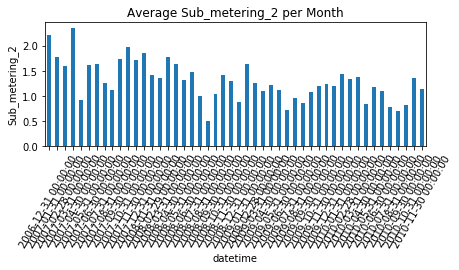

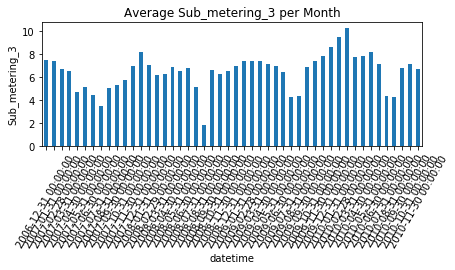

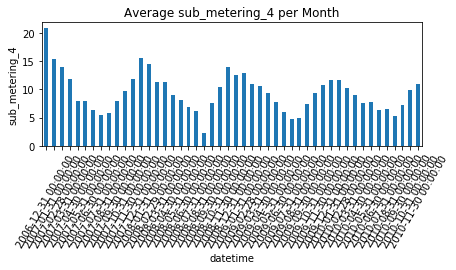

In [24]:
#Plot average values of all variables resampled over month and quarter
x=['M']
y=['Month']

for i in range(len(data_resampled.columns)):
    plt.figure(figsize=(15, 5))
    k=0
    for j in range(len(x)):
        plt.subplot(2, 2, k+1)
        name = data.columns[i]
        resample=x[j]
        data[name].resample(resample).mean().plot(kind='bar')
        title='Average '+ name+ ' per '+y[j]
        plt.title(title)
        plt.grid(False)
        plt.xticks(rotation=60)
        plt.ylabel(name)
        k=k+1
        
plt.show();

In [25]:
data_adjusted=data_resampled[12:48]
data_adjusted.shape

(36, 8)

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


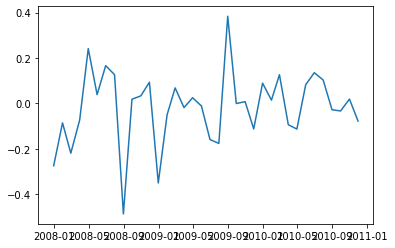

In [26]:
monthly_mean = data_resampled['Global_active_power']
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean[i] - monthly_mean[i - months_in_year]
    diff.append(value)
data_adjusted['Global_active_power']=diff
plt.plot(data_adjusted['Global_active_power'])
plt.show();

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


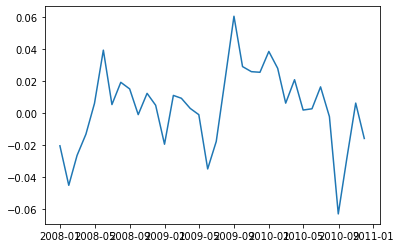

In [27]:
monthly_mean = data_resampled['Global_reactive_power']
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean[i] - monthly_mean[i - months_in_year]
    diff.append(value)
data_adjusted['Global_reactive_power']=diff
plt.plot(data_adjusted['Global_reactive_power'])
plt.show();

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


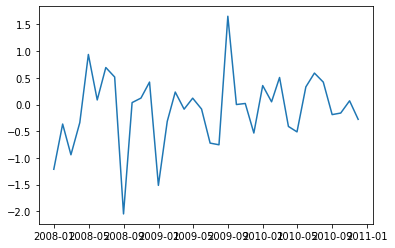

In [28]:
monthly_mean = data_resampled['Global_intensity']
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean[i] - monthly_mean[i - months_in_year]
    diff.append(value)
data_adjusted['Global_intensity']=diff
plt.plot(data_adjusted['Global_intensity'])
plt.show();

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


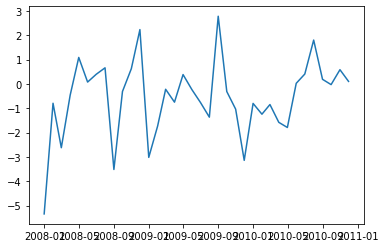

In [29]:
monthly_mean = data_resampled['sub_metering_4']
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean[i] - monthly_mean[i - months_in_year]
    diff.append(value)
data_adjusted['sub_metering_4']=diff
plt.plot(data_adjusted['sub_metering_4'])
plt.show();

In [30]:
#Testing stationarity and making stationary if not
for col in data_adjusted.columns:
    print("Testing column is:",col)
    stat_model=adf_test(data_adjusted[col],0.05)
    while stat_model==False:
        data_adjusted[col] = difference(data_adjusted[col])
        stat_model=adf_test(data_adjusted[col],0.05)  

Testing column is: Global_active_power
 Series is Non-Stationary
 Series is Stationary
Testing column is: Global_reactive_power
 Series is Stationary
Testing column is: Voltage
 Series is Stationary
Testing column is: Global_intensity
 Series is Non-Stationary
 Series is Stationary
Testing column is: Sub_metering_1
 Series is Stationary
Testing column is: Sub_metering_2
 Series is Stationary
Testing column is: Sub_metering_3


/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


 Series is Non-Stationary
 Series is Stationary
Testing column is: sub_metering_4
 Series is Non-Stationary
 Series is Non-Stationary
 Series is Stationary


In [31]:
# split into train and test sets
values = data_adjusted.values
n_train_time = 24
train = values[:n_train_time, :]
test = values[n_train_time:, :]

In [32]:
#Train the model and forecast global values
from statsmodels.tsa.api import VAR
model = VAR(train)
model_fit = model.fit()
pred = model_fit.forecast(model_fit.y, steps=12)

In [33]:
pred.shape

(12, 8)

In [34]:
result_pred=[]
for i in range(0,12):
    result_pred.append(pred[i][0])
result_pred

[-0.13375268304196197,
 0.10198939094762949,
 -0.077020502881183,
 0.06318981200884721,
 -0.016653017731979247,
 -0.00636931962747056,
 -0.003305862437926521,
 -0.007277363893237521,
 0.004175047501718154,
 -0.002177693256886215,
 -0.002098037864659119,
 -0.0041885853669683115]

In [35]:
result_actual=test[:,0]
from sklearn.metrics import mean_squared_error
mean_squared_error(result_actual, result_pred)

0.027876886428666845

In [36]:
#TRain the model with all the data available
model = VAR(values)
model_fit_final = model.fit()
pred_final = model_fit_final.forecast(model_fit_final.y, steps=12)

In [37]:
var_pred=pd.DataFrame(pred_final)
var_pred.columns=data.columns
var_pred

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,0.007,-0.013,241.106,0.023,1.055,1.127,-0.611,0.085
1,-0.026,-0.008,241.259,-0.110,0.922,1.067,-0.457,-0.235
2,0.028,-0.003,241.303,0.120,1.006,1.105,0.162,0.215
3,0.006,0.002,241.332,0.032,1.068,1.159,0.128,-0.198
4,0.010,0.004,241.326,0.044,1.104,1.176,0.055,0.039
5,0.002,0.004,241.323,0.011,1.086,1.164,-0.055,-0.064
6,0.002,0.004,241.321,0.012,1.073,1.151,-0.043,-0.010
7,0.003,0.004,241.326,0.016,1.068,1.147,-0.015,-0.022
8,0.004,0.004,241.329,0.019,1.072,1.150,0.007,-0.017
9,0.004,0.005,241.331,0.020,1.075,1.153,0.008,-0.019


In [38]:
global_values=[]
init_values = data_resampled.values
for i in range(0,48):
    global_values.append(init_values[i][0])
#for i in range(0,12):
 #   global_values.append(pred[i][0])

In [39]:
#Readjust the seasonality
monthly_mean = data_resampled['Global_active_power']
print(monthly_mean.shape)
print(monthly_mean[36])
diff = list()
j=0
for i in range(36,48):
    global_values.append(pred_final[j][0] + monthly_mean[i])
    j=j+1

(48,)
1.364426


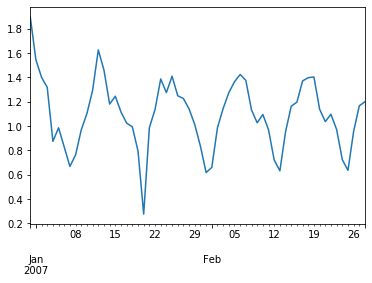

In [40]:
#Plot the forecasted values
ts = pd.Series(global_values,
              index=pd.date_range('12/31/2006', periods=60))
ts.plot();

(155, 8)
155


/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


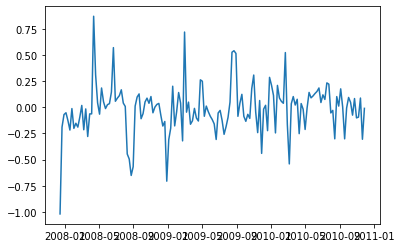

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


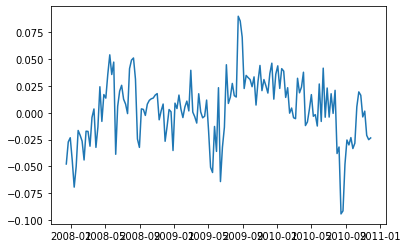

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


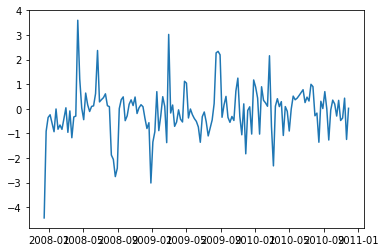

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


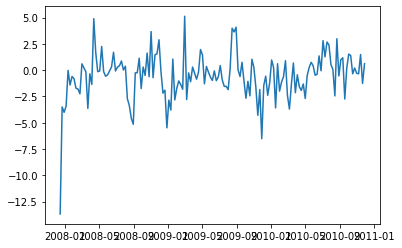

In [41]:
data_resampled=data.resample('W').mean()
data_adjusted=data_resampled[52:]
print(data_adjusted.shape)

#Adjusting seasonality
weekly_mean = data_resampled['Global_active_power']
diff = list()
for i in range(52, len(weekly_mean)):
    value = weekly_mean[i] - weekly_mean[i - 52]
    diff.append(value)
print(len(diff))
data_adjusted['Global_active_power']=diff
plt.plot(data_adjusted['Global_active_power'])
plt.show();

weekly_mean = data_resampled['Global_reactive_power']
diff = list()
for i in range(52, len(weekly_mean)):
    value = weekly_mean[i] - weekly_mean[i - 52]
    diff.append(value)
data_adjusted['Global_reactive_power']=diff
plt.plot(data_adjusted['Global_reactive_power'])
plt.show();

weekly_mean = data_resampled['Global_intensity']
diff = list()
for i in range(52, len(weekly_mean)):
    value = weekly_mean[i] - weekly_mean[i - 52]
    diff.append(value)
data_adjusted['Global_intensity']=diff
plt.plot(data_adjusted['Global_intensity'])
plt.show();

weekly_mean = data_resampled['sub_metering_4']
diff = list()
for i in range(52, len(weekly_mean)):
    value = weekly_mean[i] - weekly_mean[i - 52]
    diff.append(value)
data_adjusted['sub_metering_4']=diff
plt.plot(data_adjusted['sub_metering_4'])
plt.show();


In [42]:
for col in data_adjusted.columns:
    print("Testing column is:",col)
    stat_model=adf_test(data_adjusted[col],0.05)
    while stat_model==False:
        data_adjusted[col] = difference(data_adjusted[col])
        stat_model=adf_test(data_adjusted[col],0.05)  


Testing column is: Global_active_power
 Series is Stationary
Testing column is: Global_reactive_power
 Series is Stationary
Testing column is: Voltage
 Series is Stationary
Testing column is: Global_intensity
 Series is Stationary
Testing column is: Sub_metering_1
 Series is Stationary
Testing column is: Sub_metering_2
 Series is Stationary
Testing column is: Sub_metering_3
 Series is Stationary
Testing column is: sub_metering_4
 Series is Stationary


In [43]:
ncount = data_adjusted.shape[0]
print(ncount)

# split into train and test sets
values = data_adjusted.values
n_train_time = round(ncount/3)
print(n_train_time)
train = values[:n_train_time, :]
test = values[n_train_time:, :]
n=test.shape[0]

#Train the model and forecast global values
from statsmodels.tsa.api import VAR
model = VAR(train)
model_fit = model.fit()
pred = model_fit.forecast(model_fit.y, steps=n)


result_pred=[]
for i in range(0,n):
    result_pred.append(pred[i][0])
result_pred

result_actual=test[:,0]
print("MSE",mean_squared_error(result_actual, result_pred))

155
52
MSE 0.047446921582772555


207
(207,)
259
207


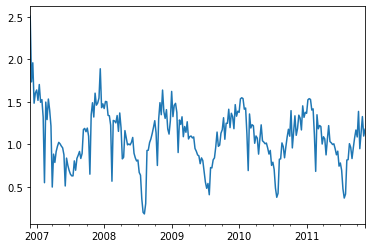

In [44]:
pred_count=52
model = VAR(values)
model_fit_final = model.fit()
pred_final = model_fit_final.forecast(model_fit_final.y, steps=pred_count)

var_pred=pd.DataFrame(pred_final)
var_pred.columns=data.columns

global_values=[]
init_values = data_resampled.values

for i in range(0,len(init_values)):
    global_values.append(init_values[i][0])
print(len(global_values))

#Readjust the seasonality
weekly_mean = data_resampled['Global_active_power']
print(weekly_mean.shape)
diff = list()
j=0
for i in range(155,207):
    global_values.append(pred_final[j][0] + weekly_mean[i])
    j=j+1

print(len(global_values))
print(ncount+pred_count)
ts = pd.Series(global_values,
              index=pd.period_range('12/2006', periods=len(global_values),freq='W'))
ts.plot();

In [45]:
pred_final.shape

(52, 8)

In [46]:
data_resampled=data.resample('D').mean()
print(data_resampled.shape)

(1442, 8)


(1077, 8)
1077


/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


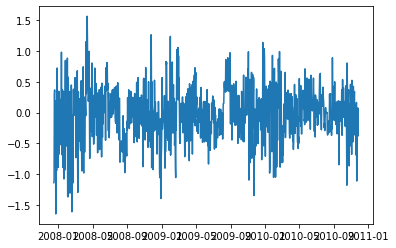

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


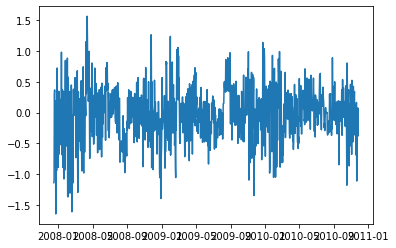

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


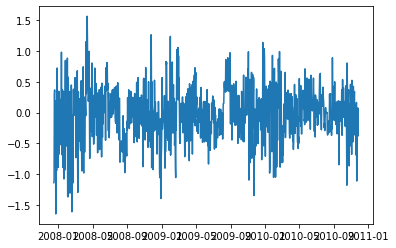

In [47]:
data_resampled=data.resample('D').mean()
data_adjusted=data_resampled[365:]
print(data_adjusted.shape)

#Adjusting seasonality
daily_mean = data_resampled['Global_active_power']
diff = list()
for i in range(365, len(daily_mean)):
    value = daily_mean[i] - daily_mean[i - 365]
    diff.append(value)
print(len(diff))
data_adjusted['Global_active_power']=diff
plt.plot(data_adjusted['Global_active_power'])
plt.show();

weekly_mean = data_resampled['Global_reactive_power']
diff = list()
for i in range(365, len(daily_mean)):
    value = daily_mean[i] - daily_mean[i - 365]
    diff.append(value)
data_adjusted['Global_reactive_power']=diff
plt.plot(data_adjusted['Global_reactive_power'])
plt.show();

weekly_mean = data_resampled['Global_intensity']
diff = list()
for i in range(365, len(daily_mean)):
    value = daily_mean[i] - daily_mean[i - 365]
    diff.append(value)
data_adjusted['Global_intensity']=diff
plt.plot(data_adjusted['Global_intensity'])
plt.show();


In [48]:
for col in data_adjusted.columns:
    print("Testing column is:",col)
    stat_model=adf_test(data_adjusted[col],0.05)
    while stat_model==False:
        data_adjusted[col] = difference(data_adjusted[col])
        stat_model=adf_test(data_adjusted[col],0.05)  
 
ncount = data_adjusted.shape[0]
print(ncount)

# split into train and test sets
values = data_adjusted.values
n_train_time = round(ncount/3)
print(n_train_time)
train = values[:n_train_time, :]
test = values[n_train_time:, :]
n=test.shape[0]

#Train the model and forecast global values
from statsmodels.tsa.api import VAR
model = VAR(train)
model_fit = model.fit()
pred = model_fit.forecast(model_fit.y, steps=n)


result_pred=[]
for i in range(0,n):
    result_pred.append(pred[i][0])
result_pred

result_actual=test[:,0]
print("MSE",mean_squared_error(result_actual, result_pred))

Testing column is: Global_active_power
 Series is Stationary
Testing column is: Global_reactive_power
 Series is Stationary
Testing column is: Voltage
 Series is Stationary
Testing column is: Global_intensity
 Series is Stationary
Testing column is: Sub_metering_1
 Series is Stationary
Testing column is: Sub_metering_2
 Series is Stationary
Testing column is: Sub_metering_3
 Series is Stationary
Testing column is: sub_metering_4
 Series is Non-Stationary
 Series is Stationary
1077
359
MSE 0.1549396131395723


/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(365, 8)
1442
(1442,)


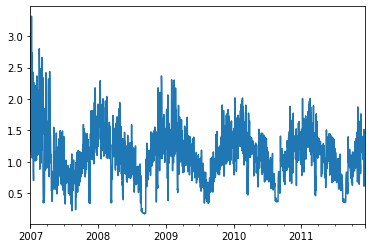

In [49]:
pred_count=365
model = VAR(values)
model_fit_final = model.fit()
pred_final = model_fit_final.forecast(model_fit_final.y, steps=pred_count)
print(pred_final.shape)
var_pred=pd.DataFrame(pred_final)
var_pred.columns=data.columns
j=0
global_values=[]
init_values = data_resampled.values
for i in range(0,len(init_values)):
    global_values.append(init_values[i][0])
print(len(global_values))

#Readjust the seasonality
daily_mean = data_resampled['Global_active_power']
print(daily_mean.shape)
diff = list()
j=0
for i in range(1077,1442):
    global_values.append(pred_final[j][0] + daily_mean[i])
    j=j+1

ts = pd.Series(global_values,
              index=pd.period_range('12/31/2006', periods=len(global_values),freq='D'))
ts.plot();

In [50]:
data_resampled=data.resample('H').mean()
data_resampled.shape

(34589, 8)

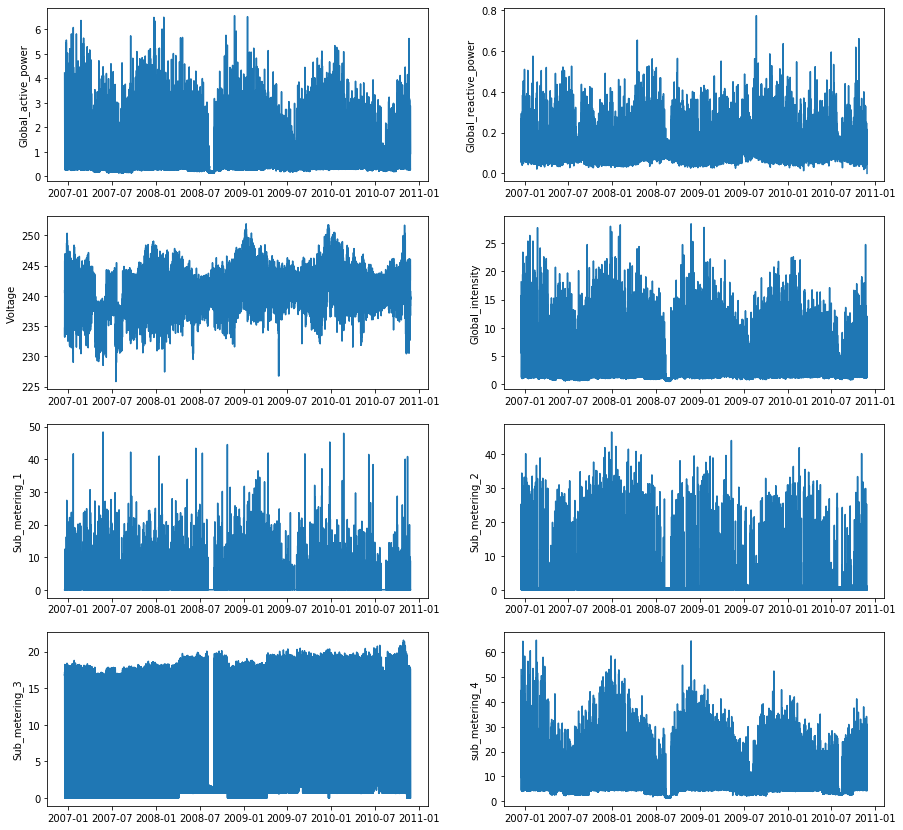

In [51]:
#Plot the variables across datetime
plt.figure(figsize=(15, 30))
for i in range(len(data_resampled.columns)):
    plt.subplot(len(data_resampled.columns), 2, i+1)
    name = data_resampled.columns[i]
    plt.plot(data_resampled[name])
    plt.ylabel(name)
    plt.grid(False)
plt.show();

(25829, 8)
25829


/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


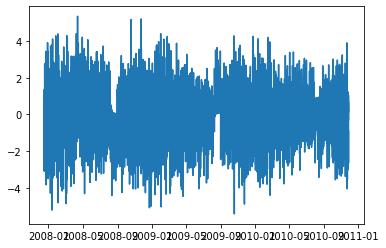

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


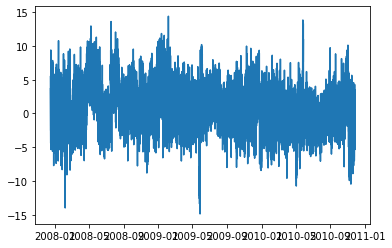

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


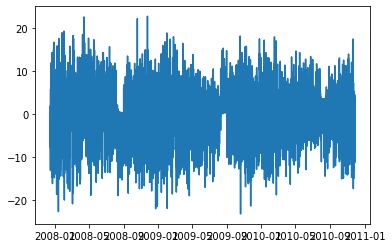

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


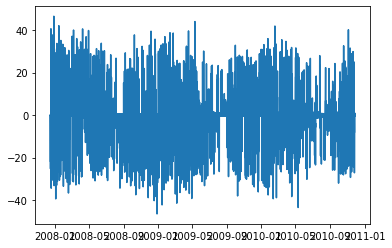

/Users/himajagaddam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


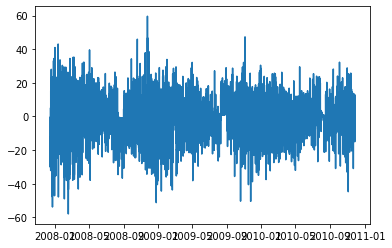

In [52]:
data_resampled=data.resample('H').mean()
data_adjusted=data_resampled[8760:]
print(data_adjusted.shape)

#Adjusting seasonality
hourly_mean = data_resampled['Global_active_power']
diff = list()
for i in range(8760, len(hourly_mean)):
    value = hourly_mean[i] - hourly_mean[i - 8760]
    diff.append(value)
print(len(diff))
data_adjusted['Global_active_power']=diff
plt.plot(data_adjusted['Global_active_power'])
plt.show();

hourly_mean = data_resampled['Voltage']
diff = list()
for i in range(8760, len(hourly_mean)):
    value = hourly_mean[i] - hourly_mean[i - 8760]
    diff.append(value)
data_adjusted['Voltage']=diff
plt.plot(data_adjusted['Voltage'])
plt.show();

hourly_mean = data_resampled['Global_intensity']
diff = list()
for i in range(8760, len(hourly_mean)):
    value = hourly_mean[i] - hourly_mean[i - 8760]
    diff.append(value)
data_adjusted['Global_intensity']=diff
plt.plot(data_adjusted['Global_intensity'])
plt.show();

hourly_mean = data_resampled['Sub_metering_2']
diff = list()
for i in range(8760, len(hourly_mean)):
    value = hourly_mean[i] - hourly_mean[i - 8760]
    diff.append(value)
data_adjusted['Sub_metering_2']=diff
plt.plot(data_adjusted['Sub_metering_2'])
plt.show();

hourly_mean = data_resampled['sub_metering_4']
diff = list()
for i in range(8760, len(hourly_mean)):
    value = hourly_mean[i] - hourly_mean[i - 8760]
    diff.append(value)
data_adjusted['sub_metering_4']=diff
plt.plot(data_adjusted['sub_metering_4'])
plt.show();

In [53]:
for col in data_adjusted.columns:
    print("Testing column is:",col)
    stat_model=adf_test(data_adjusted[col],0.05)
    while stat_model==False:
        data_adjusted[col] = difference(data_adjusted[col])
        stat_model=adf_test(data_adjusted[col],0.05)  
 
ncount = data_adjusted.shape[0]
print(ncount)

# split into train and test sets
values = data_adjusted.values
n_train_time = round(ncount/3)
print(n_train_time)
train = values[:n_train_time, :]
test = values[n_train_time:, :]
n=test.shape[0]

#Train the model and forecast global values
from statsmodels.tsa.api import VAR
model = VAR(train)
model_fit = model.fit()
pred = model_fit.forecast(model_fit.y, steps=n)


result_pred=[]
for i in range(0,n):
    result_pred.append(pred[i][0])
result_pred

result_actual=test[:,0]
print("MSE",mean_squared_error(result_actual, result_pred)) 


Testing column is: Global_active_power
 Series is Stationary
Testing column is: Global_reactive_power
 Series is Stationary
Testing column is: Voltage
 Series is Stationary
Testing column is: Global_intensity
 Series is Stationary
Testing column is: Sub_metering_1
 Series is Stationary
Testing column is: Sub_metering_2
 Series is Stationary
Testing column is: Sub_metering_3
 Series is Stationary
Testing column is: sub_metering_4
 Series is Stationary
25829
8610
MSE 0.8838929119689164


In [54]:
pred_count=365*24
model = VAR(values)
model_fit_final = model.fit()
pred_final = model_fit_final.forecast(model_fit_final.y, steps=pred_count)
print(pred_final.shape)
var_pred=pd.DataFrame(pred_final)
var_pred.columns=data.columns
j=0
global_values=[]
init_values = data_resampled.values
for i in range(0,len(init_values)):
    global_values.append(init_values[i][0])
print(len(global_values))

#Readjust the seasonality
hourly_mean = data_resampled['Global_active_power']
print(hourly_mean.shape)
diff = list()
j=0


(8760, 8)
34589
(34589,)


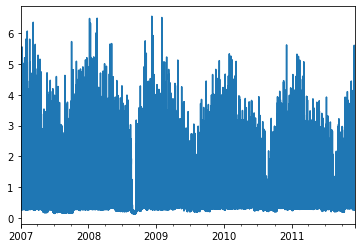

In [55]:
for i in range(25829,34589):
    global_values.append(pred_final[j][0] + hourly_mean[i])
    j=j+1
    
ts = pd.Series(global_values,
              index=pd.period_range('12/31/2006', periods=len(global_values),freq='H'))
ts.plot();

In [56]:
#Function to reshape data - LSTM
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 

In [57]:
## resampling of data over hour
df=data
df=df.drop(columns="sub_metering_4")
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [58]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled.shape

(34589, 7)

In [59]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)


In [60]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())#Split the data to train & test datasets

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1      0.637      0.296      0.338      0.631      0.000      0.011   
2      0.545      0.103      0.336      0.541      0.000      0.145   
3      0.509      0.110      0.284      0.502      0.000      0.031   
4      0.489      0.097      0.316      0.481      0.000      0.000   
5      0.456      0.099      0.434      0.450      0.000      0.009   

   var7(t-1)  var1(t)  
1      0.782    0.545  
2      0.783    0.509  
3      0.774    0.489  
4      0.779    0.456  
5      0.799    0.323  


In [61]:
values = reframed.values

n_train_time = 365*24*3
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate MSE
mse = (mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % mse)

(26280, 1, 7) (26280,) (8308, 1, 7) (8308,)
Train on 26280 samples, validate on 8308 samples
Epoch 1/20
 - 1s - loss: 0.0139 - val_loss: 0.0085
Epoch 2/20
 - 1s - loss: 0.0099 - val_loss: 0.0081
Epoch 3/20
 - 1s - loss: 0.0096 - val_loss: 0.0082
Epoch 4/20
 - 1s - loss: 0.0095 - val_loss: 0.0082
Epoch 5/20
 - 1s - loss: 0.0095 - val_loss: 0.0082
Epoch 6/20
 - 1s - loss: 0.0095 - val_loss: 0.0081
Epoch 7/20
 - 1s - loss: 0.0094 - val_loss: 0.0081
Epoch 8/20
 - 1s - loss: 0.0094 - val_loss: 0.0081
Epoch 9/20
 - 1s - loss: 0.0094 - val_loss: 0.0081
Epoch 10/20
 - 1s - loss: 0.0094 - val_loss: 0.0081
Epoch 11/20
 - 1s - loss: 0.0094 - val_loss: 0.0081
Epoch 12/20
 - 1s - loss: 0.0093 - val_loss: 0.0081
Epoch 13/20
 - 1s - loss: 0.0093 - val_loss: 0.0081
Epoch 14/20
 - 1s - loss: 0.0093 - val_loss: 0.0081
Epoch 15/20
 - 1s - loss: 0.0093 - val_loss: 0.0081
Epoch 16/20
 - 1s - loss: 0.0093 - val_loss: 0.0081
Epoch 17/20
 - 1s - loss: 0.0093 - val_loss: 0.0080
Epoch 18/20
 - 1s - loss: 0.0093

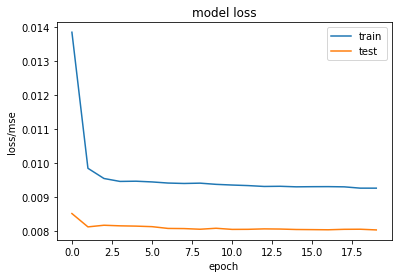

In [62]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss/mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [63]:
values = reframed.values

train = values

##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))

print(train_X.shape, train_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, verbose=2, shuffle=False)



(34588, 1, 7) (34588,)
Epoch 1/20
 - 1s - loss: 0.0124
Epoch 2/20
 - 1s - loss: 0.0093
Epoch 3/20
 - 1s - loss: 0.0091
Epoch 4/20
 - 1s - loss: 0.0090
Epoch 5/20
 - 1s - loss: 0.0090
Epoch 6/20
 - 1s - loss: 0.0090
Epoch 7/20
 - 1s - loss: 0.0090
Epoch 8/20
 - 1s - loss: 0.0089
Epoch 9/20
 - 1s - loss: 0.0089
Epoch 10/20
 - 1s - loss: 0.0089
Epoch 11/20
 - 1s - loss: 0.0089
Epoch 12/20
 - 1s - loss: 0.0089
Epoch 13/20
 - 1s - loss: 0.0089
Epoch 14/20
 - 1s - loss: 0.0089
Epoch 15/20
 - 1s - loss: 0.0089
Epoch 16/20
 - 1s - loss: 0.0089
Epoch 17/20
 - 1s - loss: 0.0089
Epoch 18/20
 - 1s - loss: 0.0089
Epoch 19/20
 - 1s - loss: 0.0088
Epoch 20/20
 - 1s - loss: 0.0088
